In [102]:
# Importing Packages and Preprocessing the dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv(r'C:\Users\user\Downloads\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [105]:
df.drop(['ID'],inplace=True,axis=1)

In [107]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

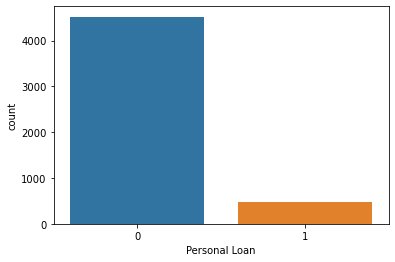

In [108]:
sns.countplot(x='Personal Loan',data=df)


In [109]:
## Binning and Label Encoding

In [110]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])


In [111]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [113]:
df['Age']

0       2
1       0
2       0
3       0
4       0
       ..
4995    2
4996    2
4997    1
4998    1
4999    2
Name: Age, Length: 5000, dtype: int32

In [114]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [115]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [116]:
##Splitting the Data

In [117]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [119]:
#Neural Nets

In [120]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()
keras.add(Dense(12,input_dim=12,activation='relu'))
keras.add(Dense(8,activation='relu'))
keras.add(Dense(6,activation='relu'))

In [121]:
keras.add(Dense(1,activation='sigmoid'))

In [122]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [123]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 1s 978us/step - loss: 436.9903 - accuracy: 0.5944
Epoch 2/20
150/150 [==============================] - 0s 924us/step - loss: 0.3252 - accuracy: 0.9080
Epoch 3/20
150/150 [==============================] - 0s 990us/step - loss: 0.3224 - accuracy: 0.9080
Epoch 4/20
150/150 [==============================] - 0s 897us/step - loss: 0.3182 - accuracy: 0.9080
Epoch 5/20
150/150 [==============================] - 0s 850us/step - loss: 0.3161 - accuracy: 0.9080
Epoch 6/20
150/150 [==============================] - 0s 938us/step - loss: 0.3165 - accuracy: 0.9080
Epoch 7/20
150/150 [==============================] - 0s 883us/step - loss: 0.3194 - accuracy: 0.9080
Epoch 8/20
150/150 [==============================] - 0s 897us/step - loss: 0.3156 - accuracy: 0.9080
Epoch 9/20
150/150 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.9080
Epoch 10/20
150/150 [==============================] - 0s 1ms/step - loss: 0.3157 

In [124]:
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 0s 827us/step - loss: 0.3052 - accuracy: 0.9080
90.79999923706055


In [125]:

y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 818us/step


In [126]:
#Accuracy Score

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.892

In [128]:
from keras import backend as K
def r_loss(y_test,y_pred):
    res=K.sum(K.square(y_test-y_pred))    
    total=K.sum(K.square(y_test-K.mean(y_test)))
    return 1-(1-res/(total+K.epsilon()))

In [129]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [132]:
y_train_reshaped = y_train.reshape((y_train.shape[0], 1))

In [133]:
#Ant Colony Optimisation

In [134]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
    
    def forward(self, X):
        self.hidden = np.maximum(0, np.dot(X, self.weights1))
        self.output = np.dot(self.hidden, self.weights2)
        return self.output
    
    def backward(self, X, y, output):
        delta2 = output - y
        dweights2 = np.dot(self.hidden.T, delta2)
        delta1 = np.dot(delta2, self.weights2.T) * (self.hidden > 0)
        dweights1 = np.dot(X.T, delta1)
        return dweights1, dweights2

In [135]:
class AntColony:

    def __init__(self, n_ants, n_iterations, alpha, beta, rho, Q):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
         
    def run(self, nn, X_train, y_train):
        pheromone = np.zeros(nn.weights1.shape)
        best_weights1 = nn.weights1
        best_weights2 = nn.weights2
        best_acc = 0
        
        for iteration in range(self.n_iterations):
            for ant in range(self.n_ants):
                weights1 = nn.weights1 + pheromone
                nn.weights1 = weights1
                output = nn.forward(X_train)
                acc = accuracy(output, y_train)
                dweights1, dweights2 = nn.backward(X_train, y_train_reshaped, output)
                pheromone = self.rho * pheromone + self.Q * (dweights1 / acc)
                
                if acc > best_acc:
                    best_acc = acc
                    best_weights1 = nn.weights1
                    best_weights2 = nn.weights2
            
            nn.weights1 = best_weights1
            nn.weights2 = best_weights2
        
        return nn

In [136]:
def accuracy(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis=1)
    return np.mean(y_pred == y_true)

In [137]:
nn = NeuralNetwork(X_train.shape[1], 100, 2)
aco = AntColony(n_ants=10, n_iterations=100, alpha=1, beta=2, rho=0.5, Q=100)

nn = aco.run(nn, X_train, y_train)
output = nn.forward(X_test)
acc = accuracy(output, y_test)
print(f'Test accuracy: {acc:.2f}')

C:\Users\user\AppData\Local\Temp/ipykernel_6248/2314966178.py:24: RuntimeWarning: overflow encountered in multiply
  pheromone = self.rho * pheromone + self.Q * (dweights1 / acc)


Test accuracy: 0.89
